In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from timeit import default_timer as timer

#### Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

In [3]:
def f(a,b,r):
    for i in range(len(a)):
        if (a[i]>=r):
            return(b[i])

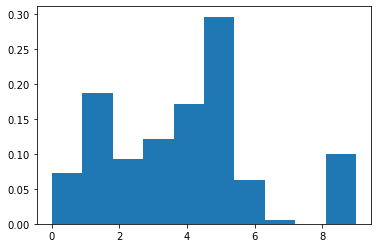

2.3482450999999855


In [4]:
a=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
a=a/a.sum()
b=np.arange(10)
for i in range(len(a)):
    a[-i-1]+=a[:-i-1].sum()
start=timer()
for i in range(1000):
    random = np.array([f(a,b,np.random.rand()) for j in range(1000)])
end=timer()
plt.hist(random, density=True)
plt.show()
print(end-start)

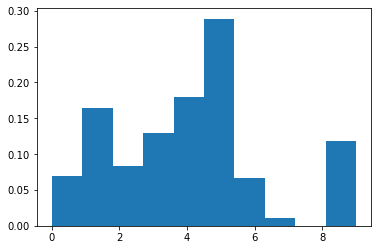

2.0019199000000185


In [5]:
a=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
a=a/a.sum()
b=a.argsort()[::-1]
a.sort()
a=a[::-1]
for i in range(len(a)):
    a[-i-1]+=a[:-i-1].sum()
start=timer()
for i in range(1000):
    random = np.array([f(a,b,np.random.rand()) for j in range(1000)])
end=timer()
plt.hist(random, density=True)
plt.show()
print(end-start)

#### Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

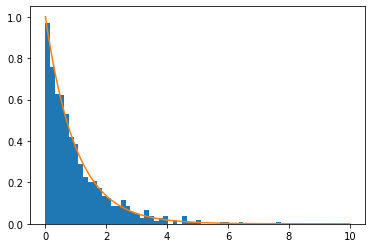

In [6]:
random = np.array([-np.log(1-np.random.rand()) for j in range(1000)])
plt.hist(random, density=True, bins=50)
plt.plot(np.linspace(0,10,100),stats.expon().pdf(np.linspace(0,10,100)))
plt.show()

#### Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

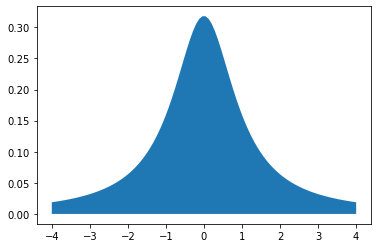

In [7]:
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

Вероятность попасть в отрезок равна площади под графиком плотности над этим отрезком

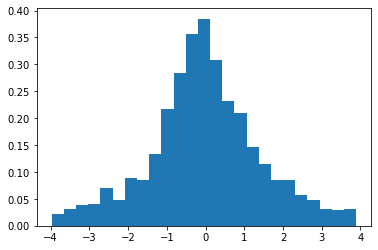

In [9]:
a=np.empty(1000)
for i in range(1000):
    x=np.random.rand()*8-4
    y=np.random.rand()/2
    while (y>stats.cauchy().pdf(x)):
        x=np.random.rand()*8-4
        y=np.random.rand()/2
    a[i]=x
plt.hist(a, density=True,bins=25)
plt.show()

#### Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

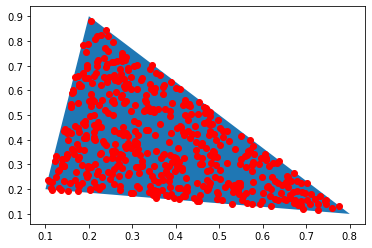

In [405]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
a = np.array([np.random.rand() for i in range(500)])
a=np.sqrt(a)
b = np.array([np.random.rand() for i in range(500)])
plt.scatter((1-a)*0.1+a*(1-b)*0.2+b*a*0.8,(1-a)*0.2+a*(1-b)*0.9+b*a*0.1,c="r")
plt.show()

#### Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

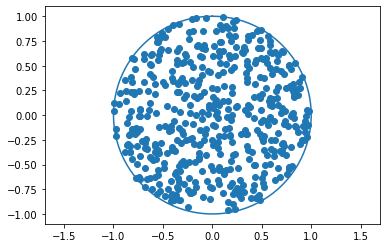

In [407]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
r=np.empty(500)
phi=np.empty(500)
r=np.sqrt(np.random.rand(1,500))
phi=np.random.rand(1,500)*2*np.pi
plt.scatter(r*np.cos(phi),r*np.sin(phi))
plt.axis('equal')
plt.show()

#### Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

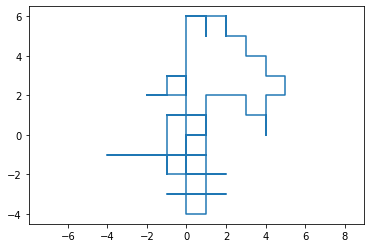

In [410]:
n=100
moves=np.zeros([2,n+1])
t=np.array([np.random.randint(0,2) for i in range(n//2)])
ud=len(t[t==0])*2
updowns=np.random.choice(np.arange(n),ud,replace=False)+1
updowns.sort()
ups=np.random.choice(updowns,ud//2,replace=False)
ups.sort()
moves[1,ups]=1
moves[1,updowns]=moves[1,updowns]*2-1
leftrights=np.arange(n)[moves[1,1:]==0]+1
lefts=np.random.choice(leftrights,50-ud//2,replace=False)
moves[0,lefts]=-1
moves[0,leftrights]=moves[0,leftrights]*2+1
for i in range(n+1):
    moves[0,-i-1]+=moves[0,:-i-1].sum()
    moves[1,-i-1]+=moves[1,:-i-1].sum()
plt.plot(moves[0],moves[1])
plt.axis('equal')
plt.show()

#### Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

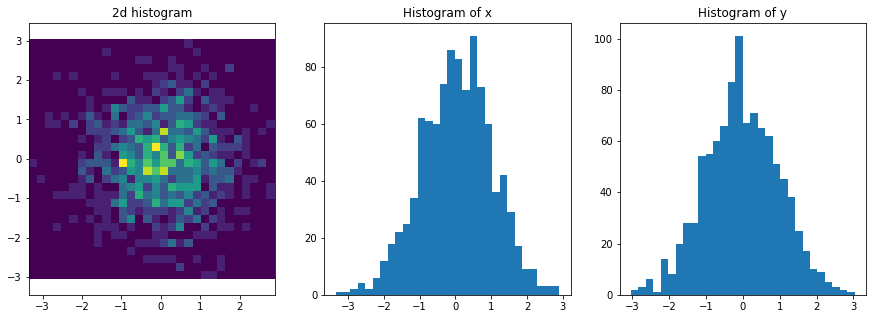

In [5]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

np.sqrt(-2 * np.log(u1)) - обратное для положительной половины нормального. Вращение нормального есть двумерное нормальное.

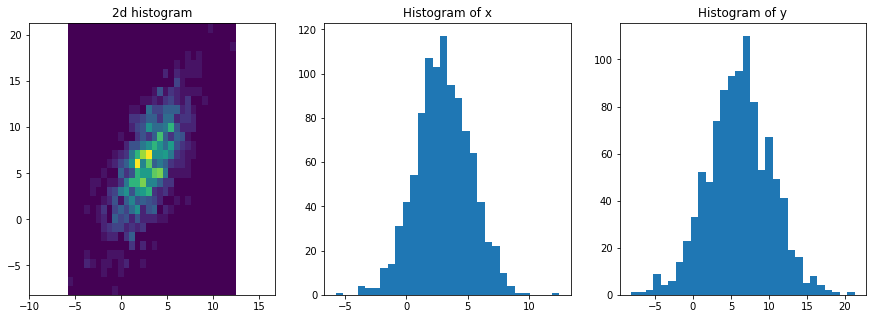

In [412]:
n = 1000
u1, u2 = np.random.rand(2, n)*2-1
for i in range(n):
    while u1[i]*u1[i]+u2[i]*u2[i]>1:
        u1[i],u2[i]=np.random.rand(2)*2-1
s=u1*u1+u2*u2
tx=u1*np.sqrt(-2*np.log(s)/s)
ty=u2*np.sqrt(-2*np.log(s)/s)
x = tx * 2 + ty +3
y = tx + ty * 4 +6
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

#### Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [203]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])

In [259]:
from scipy.linalg import sqrtm
a=np.zeros([9,10000])
for i in range(10000):
    a[:,i]=np.random.normal(0,1,9)
C=sqrtm(B)
print((C.imag>1e-8).any())
c=np.matmul(C.real,a)
print(abs(np.cov(c)-B)>0.1)

False
[[False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]]


Вектор CxN(0,E) имеет ковариационную матрицу CxC.T

#### С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число  π . Теоретически обоснуйте необходимое число бросаний, чтобы оценить число  π  с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

In [337]:
n=88917712
print(4*(np.square(np.random.rand(2,n)).sum(axis=0)<1).sum()/n)

3.1417164670184046


Если n большое, то в силу центральной предельной теоремы для Бернулли $Bin(n,p) \approx N(np,npq)$, значит $N(0,1) \approx \sqrt{n}\frac{\frac{Bin(n,p)}{n}-p}{\sqrt{pq}}$ должно принадлежать $\sqrt{n}\frac{\frac{[3.141,3.142)}{4}-p}{\sqrt{pq}}$ с вероятностью 0.99

In [350]:
seg=np.array([3.141,3.142])/4
p=np.pi/4
t=np.zeros(2)
n=88917700 
while(t[1]-t[0]<0.99):
    n=n+1
    t=stats.norm.cdf((seg-p)/(np.sqrt(p*(1-p)))*np.sqrt(n))
print(n)

88917712


In [339]:
n=60000000
suc=0
while(suc<99):
    suc=0
    for i in range(100):
        pi=4*(np.square(np.random.rand(2,n)).sum(axis=0)<1).sum()/n
        if((pi<3.142)and(pi>=3.141)):
            suc+=1
    print(n,suc)
    n+=5000000

60000000 98
65000000 98
70000000 97
75000000 99


In [340]:
n=75000000
suc=0
while(suc<99):
    suc=0
    for i in range(100):
        pi=4*(np.square(np.random.rand(2,n)).sum(axis=0)<1).sum()/n
        if((pi<3.142)and(pi>=3.141)):
            suc+=1
    print(n,suc)
    n+=5000000

75000000 100


кажется, что 75000000 хватает

#### Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

In [398]:
n=100
k=1
a=np.zeros(n)
for i in range(n):
    a[i]=np.random.randint(0,k)
    if a[i]==k-1:
        k+=1
print(a,k)

[0. 0. 1. 0. 0. 1. 0. 1. 2. 3. 1. 0. 2. 4. 0. 0. 0. 5. 3. 3. 2. 3. 0. 2.
 4. 1. 5. 0. 5. 1. 5. 2. 2. 3. 0. 3. 4. 0. 2. 2. 5. 0. 3. 2. 1. 0. 1. 4.
 0. 0. 3. 3. 0. 2. 4. 2. 2. 5. 0. 5. 3. 3. 4. 6. 3. 5. 5. 0. 5. 7. 1. 8.
 4. 8. 2. 0. 9. 1. 5. 8. 3. 5. 1. 3. 4. 5. 9. 6. 6. 6. 9. 1. 2. 7. 8. 7.
 4. 2. 1. 3.] 11


In [402]:
n=100
ans=0;
for j in range(10000):
    k=1
    a=np.zeros(n)
    for i in range(n):
        a[i]=np.random.randint(0,k)
        if a[i]==k-1:
            k+=1
    ans+=k-1
ans=ans/10000
print(ans)

13.4916
